# Veamos con un ejemplo el uso de concat - merge - join

Contamos con dos estaciones meteorológicas, cada una instalada en una ubicación geográfica diferente, que sensan datos de temperatura, presión y humedad cada una hora.
<BR>
Simulemos algunas mediciones y armemos dos dataframes, uno para cada estación y con datos de un mismo día

In [36]:
import pandas as pd
import numpy as np

# Creamos una serie tipo datetime con 24 valores, mismo día y 24 horas.
horas = pd.date_range("2025-10-11 00:00", periods=24, freq="H")
horas

/tmp/ipython-input-1847358487.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  horas = pd.date_range("2025-10-11 00:00", periods=24, freq="H")


DatetimeIndex(['2025-10-11 00:00:00', '2025-10-11 01:00:00',
               '2025-10-11 02:00:00', '2025-10-11 03:00:00',
               '2025-10-11 04:00:00', '2025-10-11 05:00:00',
               '2025-10-11 06:00:00', '2025-10-11 07:00:00',
               '2025-10-11 08:00:00', '2025-10-11 09:00:00',
               '2025-10-11 10:00:00', '2025-10-11 11:00:00',
               '2025-10-11 12:00:00', '2025-10-11 13:00:00',
               '2025-10-11 14:00:00', '2025-10-11 15:00:00',
               '2025-10-11 16:00:00', '2025-10-11 17:00:00',
               '2025-10-11 18:00:00', '2025-10-11 19:00:00',
               '2025-10-11 20:00:00', '2025-10-11 21:00:00',
               '2025-10-11 22:00:00', '2025-10-11 23:00:00'],
              dtype='datetime64[ns]', freq='h')

In [41]:
# Simulamos el dataframe de la Estacion 1
estacion1 = pd.DataFrame({
    "hora": horas,
    "estacion": "E1",
    "temperatura": np.random.normal(20, 3, 24),  # genera 24 valores (dist normal) con media 20 y desviación 3
    "presion": np.random.normal(1013, 5, 24),  # genera 24 valores (dist normal) con media 1013 y desviación 5
    "humedad": np.random.uniform(40, 80, 24)  # genera 24 valores (dist uniform) con media 40 y desviación 8
})

In [48]:
estacion1.head(5)

,hora,estacion,temperatura,presion,humedad
0,2025-10-11 00:00:00,E1,19.352252,1012.153835,46.593905
1,2025-10-11 01:00:00,E1,16.984073,1011.495629,59.272331
2,2025-10-11 02:00:00,E1,23.061346,1009.996171,45.404600
3,2025-10-11 03:00:00,E1,23.791677,1014.868779,71.661427
4,2025-10-11 04:00:00,E1,23.929581,1008.514577,50.658296


In [ ]:
import matplotlib.pyplot as plt
estacion1["temperatura"].hist(bins="auto")
plt.show()

In [ ]:
# Graficamos las temperaturas de 1 día
estacion1.plot(x="hora", y="temperatura", kind="line")
plt.show()

In [44]:
# Simulamos el dataframe de la Estacion 1
estacion2 = pd.DataFrame({
    "hora": horas,
    "estacion": "E2",
    "temperatura": np.random.normal(18, 2, 24),
    "presion": np.random.normal(1010, 4, 24),
    "humedad": np.random.uniform(35, 75, 24)
})

In [47]:
estacion2.head()

,hora,estacion,temperatura,presion,humedad
0,2025-10-11 00:00:00,E2,17.747434,1004.985796,60.769115
1,2025-10-11 01:00:00,E2,17.855176,1017.214735,37.488889
2,2025-10-11 02:00:00,E2,18.564985,1009.277734,59.344046
3,2025-10-11 03:00:00,E2,14.656148,1009.482442,37.641221
4,2025-10-11 04:00:00,E2,18.537372,1009.268772,52.237370


## concat - Unificamos dos datasets usando concat

 La forma más natural de unificarlos en pandas es usando:
<BR>
`pd.concat()`
<BR>
Sirve para apilar DataFrames (uno debajo del otro o lado a lado).
Es ideal cuando los DataFrames tienen las mismas columnas (por ejemplo, mismo formato de mediciones de distintas estaciones).
<BR>
Por default, apila los datos verticalmente (uno debajo de otro), por lo que `axis = 0`
<BR>
Para ubicar los dataframes, uno seguido del otro, usamos el argumento `axis = 1`
<BR>
Cada dataframe tiene su index, por lo que es buena práctica al usar concat, regenerar el index en el dataframe resultante, para ello usamos `ignore_index=True`

In [56]:
# Unificamos los datos de ambas estaciones
est1_est2 = pd.concat([estacion2, estacion1], axis=0, ignore_index=True)
est1_est2.head(5)

,hora,estacion,temperatura,presion,humedad
0,2025-10-11 00:00:00,E2,17.747434,1004.985796,60.769115
1,2025-10-11 01:00:00,E2,17.855176,1017.214735,37.488889
2,2025-10-11 02:00:00,E2,18.564985,1009.277734,59.344046
3,2025-10-11 03:00:00,E2,14.656148,1009.482442,37.641221
4,2025-10-11 04:00:00,E2,18.537372,1009.268772,52.237370


## merge - une los dataframes por una columna en común
Lo usamos para comparar las mediciones de las estaciones


In [65]:
# Merge por la columna 'hora' (igual que un JOIN ON hora)
e1_e2_merge = pd.merge(
    estacion1,
    estacion2,
    on="hora",
    how="inner",
    suffixes=("_E1", "_E2")
)

In [66]:
e1_e2_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   hora            24 non-null     datetime64[ns]
 1   estacion_E1     24 non-null     object        
 2   temperatura_E1  24 non-null     float64       
 3   presion_E1      24 non-null     float64       
 4   humedad_E1      24 non-null     float64       
 5   estacion_E2     24 non-null     object        
 6   temperatura_E2  24 non-null     float64       
 7   presion_E2      24 non-null     float64       
 8   humedad_E2      24 non-null     float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.8+ KB


In [67]:
e1_e2_merge.head()

,hora,estacion_E1,temperatura_E1,presion_E1,humedad_E1,estacion_E2,temperatura_E2,presion_E2,humedad_E2
0,2025-10-11 00:00:00,E1,19.352252,1012.153835,46.593905,E2,17.747434,1004.985796,60.769115
1,2025-10-11 01:00:00,E1,16.984073,1011.495629,59.272331,E2,17.855176,1017.214735,37.488889
2,2025-10-11 02:00:00,E1,23.061346,1009.996171,45.404600,E2,18.564985,1009.277734,59.344046
3,2025-10-11 03:00:00,E1,23.791677,1014.868779,71.661427,E2,14.656148,1009.482442,37.641221
4,2025-10-11 04:00:00,E1,23.929581,1008.514577,50.658296,E2,18.537372,1009.268772,52.237370


## join - une los dataframes por el index


In [68]:
# Establecemos 'hora' como índice
estacion1 = estacion1.set_index("hora")
estacion2 = estacion2.set_index("hora")

In [71]:
# Unimos por índice (hora)
e1_e2_join = estacion1.join(estacion2, lsuffix="_E1", rsuffix="_E2")
e1_e2_join.head()

,estacion_E1,temperatura_E1,presion_E1,humedad_E1,estacion_E2,temperatura_E2,presion_E2,humedad_E2
hora,,,,,,,,
2025-10-11 00:00:00,E1,19.352252,1012.153835,46.593905,E2,17.747434,1004.985796,60.769115
2025-10-11 01:00:00,E1,16.984073,1011.495629,59.272331,E2,17.855176,1017.214735,37.488889
2025-10-11 02:00:00,E1,23.061346,1009.996171,45.404600,E2,18.564985,1009.277734,59.344046
2025-10-11 03:00:00,E1,23.791677,1014.868779,71.661427,E2,14.656148,1009.482442,37.641221
2025-10-11 04:00:00,E1,23.929581,1008.514577,50.658296,E2,18.537372,1009.268772,52.237370


In [73]:
# Unimos solo la columna 'temperatura' de la segunda estación
e1_e2_join_cust = estacion1.join(estacion2["temperatura"], lsuffix="_E1", rsuffix="_E2")
e1_e2_join_cust.head()

,estacion,temperatura_E2,presion,humedad,temperatura_E1
hora,,,,,
2025-10-11 00:00:00,E1,19.352252,1012.153835,46.593905,17.747434
2025-10-11 01:00:00,E1,16.984073,1011.495629,59.272331,17.855176
2025-10-11 02:00:00,E1,23.061346,1009.996171,45.404600,18.564985
2025-10-11 03:00:00,E1,23.791677,1014.868779,71.661427,14.656148
2025-10-11 04:00:00,E1,23.929581,1008.514577,50.658296,18.537372


In [76]:
# Unimos solo las columnas de temperatura de ambas estaciones
e1_e2_join_cust = estacion1[["temperatura"]].join(estacion2["temperatura"], lsuffix="_E1", rsuffix="_E2")
e1_e2_join_cust.head()

,temperatura_E1,temperatura_E2
hora,,
2025-10-11 00:00:00,19.352252,17.747434
2025-10-11 01:00:00,16.984073,17.855176
2025-10-11 02:00:00,23.061346,18.564985
2025-10-11 03:00:00,23.791677,14.656148
2025-10-11 04:00:00,23.929581,18.537372


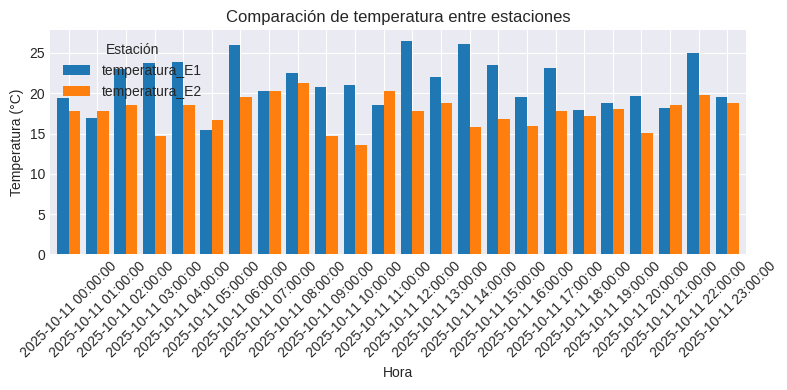

In [78]:
import matplotlib.pyplot as plt

# Set a style for the plot (you can change 'seaborn-v0_8-darkgrid' to another style)
plt.style.use('seaborn-v0_8-darkgrid')


# Graficamos barras comparativas
e1_e2_join_cust.plot(
    kind="bar",
    figsize=(8, 4),
    width=0.8
)

plt.title("Comparación de temperatura entre estaciones")
plt.xlabel("Hora")
plt.ylabel("Temperatura (°C)")
plt.xticks(rotation=45)
plt.legend(title="Estación")
plt.tight_layout()
plt.show()

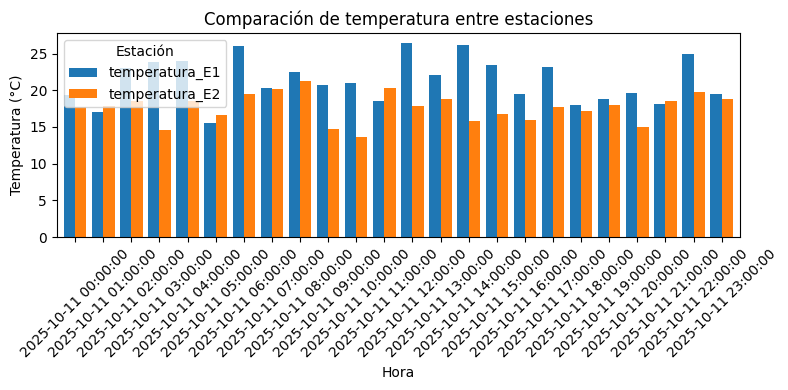

In [77]:
# Vere un gráfico comparativo
import matplotlib.pyplot as plt

# Graficamos barras comparativas
e1_e2_join_cust.plot(
    kind="bar",
    figsize=(8, 4),
    width=0.8
)

plt.title("Comparación de temperatura entre estaciones")
plt.xlabel("Hora")
plt.ylabel("Temperatura (°C)")
plt.xticks(rotation=45)
plt.legend(title="Estación")
plt.tight_layout()
plt.show()


Si trabajás con datos horarios o diarios, join() es muy cómodo porque muchas veces ya tenés el tiempo como índice (DatetimeIndex). Te permite hacer operaciones de series temporales como:

# Importamos Dataset Booking - Hotels - Users
https://www.kaggle.com/code/sonawanelalitsunil/international-hotel-booking-analytics-ml-34-75/notebook

In [79]:
# Importar la librería Pandas
import pandas as pd

In [80]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
# Verificar que los archivos csv se encuentren en la carpeta datasets
import os
os.listdir("/content/drive/MyDrive/datasets")

['netflix-shows.zip',
 'international-hotel-booking-analytics.zip',
 'netflix_titles.csv',
 'satis_clientes.csv',
 'sakila.db',
 'booking_db_nulls.sqlite',
 'booking_db.sqlite',
 'users.csv',
 'hotels.csv',
 'reviews.csv',
 'amazon.csv',
 'Walmart_Sales.csv',
 'train.csv']

In [82]:
# Cambiamos el directorio para importar con facilidad
os.chdir("/content/drive/MyDrive/datasets")
os.listdir(".")

['netflix-shows.zip',
 'international-hotel-booking-analytics.zip',
 'netflix_titles.csv',
 'satis_clientes.csv',
 'sakila.db',
 'booking_db_nulls.sqlite',
 'booking_db.sqlite',
 'users.csv',
 'hotels.csv',
 'reviews.csv',
 'amazon.csv',
 'Walmart_Sales.csv',
 'train.csv']

In [83]:
# Importamos Reviews
reviews = pd.read_csv('reviews.csv')

In [84]:
# Importamos Hotels
hotels = pd.read_csv('hotels.csv')

In [85]:
# Importamos Users
users = pd.read_csv('users.csv')

In [86]:
hotels.columns

Index(['hotel_id', 'hotel_name', 'city', 'country', 'star_rating', 'lat',
       'lon', 'cleanliness_base', 'comfort_base', 'facilities_base',
       'location_base', 'staff_base', 'value_for_money_base'],
      dtype='object')

In [87]:
reviews.columns

Index(['review_id', 'user_id', 'hotel_id', 'review_date', 'score_overall',
       'score_cleanliness', 'score_comfort', 'score_facilities',
       'score_location', 'score_staff', 'score_value_for_money',
       'review_text'],
      dtype='object')

## Actividad 1 (Dificultad *)
Reproducir la siguiente consulta SQL con Pandas


```
select h.hotel_name, h.country, r.score_overall
from  hotels h join reviews r
on h.hotel_id == r.hotel_id
```

In [ ]:
# Merge (equivalente al SQL JOIN)
hotels_reviews = pd.merge(
    hotels,
    reviews,
    on="hotel_id",
    how="inner"
)
hotels_reviews.head()

In [90]:
# Seleccionamos solo las columnas que nos solicitan
hotels_reviews = hotels_reviews[["hotel_name", "country", "score_overall"]]
hotels_reviews.head()

,hotel_name,country,score_overall
0,The Azure Tower,United States,8.7
1,The Azure Tower,United States,8.7
2,The Azure Tower,United States,8.8
3,The Azure Tower,United States,8.8
4,The Azure Tower,United States,8.7


## Actividad 2 (Dificultad *)
Reproducir la siguiente consulta SQL con Pandas


```
select h.hotel_name, h.country, avg(r.score_overall) as avg_score
from  hotels h join reviews r
on h.hotel_id == r.hotel_id
GROUP by h.hotel_name, h.country
```

In [ ]:
# Merge (equivalente al SQL JOIN)
hotels_reviews = hotels_reviews[["hotel_name", "country", "score_overall"]]

In [91]:
# Agrupación / Agregación
result = hotels_reviews.groupby(["hotel_name", "country"]).agg(
    avg_score = ("score_overall", "mean")
)
result.head()

,,avg_score
hotel_name,country,
Aztec Heights,Mexico,8.759381
Berlin Mitte Elite,Germany,9.002324
Canal House Grand,Netherlands,9.090713
Colosseum Gardens,Italy,9.044140
Copacabana Lux,Brazil,8.869113


## Actividad 3 (Dificultad ***)
Reproducir la siguiente consulta SQL con Pandas


```
select h.hotel_name, h.country, avg(r.score_overall) as avg_score
from  hotels h join reviews r
on h.hotel_id == r.hotel_id
WHERE h.country like '%argentina%'
GROUP by h.hotel_name, h.country
```



In [ ]:
# Merge (equivalente al SQL JOIN)
hotels_reviews = hotels_reviews[["hotel_name", "country", "score_overall"]]

In [96]:
# Filtro (equivalente al WHERE con LIKE)
filtered=hotels_reviews[hotels_reviews["country"].str.contains("Argentina", case=False)]
filtered.head()


,hotel_name,country,score_overall
43935,Tango Boutique,Argentina,8.9
43936,Tango Boutique,Argentina,8.9
43937,Tango Boutique,Argentina,8.7
43938,Tango Boutique,Argentina,9.0
43939,Tango Boutique,Argentina,8.9


In [93]:
# Agrupación y promedio (equivalente al GROUP BY y AVG)
result=(
    filtered.groupby(["hotel_name", "country"])
    .agg(avg_score=("score_overall", "mean"))
)
result.head()


,,avg_score
hotel_name,country,
Tango Boutique,Argentina,8.822495


## Bonus Track
Usar OpenStreetMap para encontrar la dirección del Hotel

In [97]:
hotels[hotels["hotel_name"]=="Tango Boutique"]

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
22,23,Tango Boutique,Buenos Aires,Argentina,5,-34.6037,-58.3816,8.9,8.8,8.7,9.0,8.8,8.7


In [ ]:
# https://www.openstreetmap.org/search?lat=-34.6037&lon=-58.3816&zoom=10#map=12/-37.2888/-59.1229